<h1>CG20_Aula_07_KMeans</h1>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mylib import *

In [2]:
fatia = np.load("secao_do_plug.npy")
show_npy(fatia)

shape=(925, 920), type=uint16
min= 0, max=10184


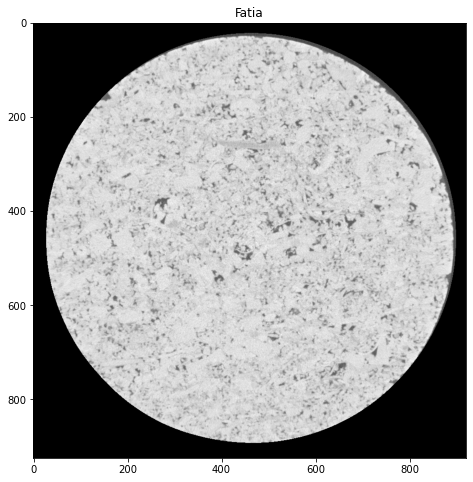

In [3]:
show_gray(fatia,"Fatia")

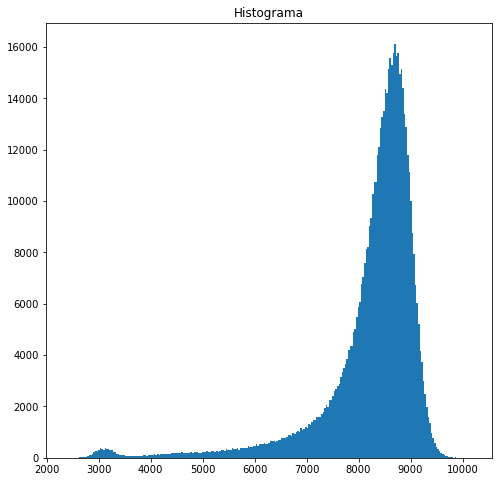

In [4]:
data = fatia[fatia>0]
show_hist(data.ravel(),"Histograma")

<h3>Algoritmo de KMeans</h3>
<ol>
    <li>Determine a posição de k representantes</li>
    <li>Agrupe todos os pontos em torno dos seus representantes</li>
    <li>Recalcule a posição dos representantes</li>
    <li>Repita passos 1 e 2 até convergir</li>
 </ol>

In [5]:
def rep_ini(k,data):
    vmin = np.amin(data)
    vmax = np.amax(data)
    deltav = (vmax-vmin)/k
    rep_pos = []
    pos0 = vmin + 0.5*deltav
    for i in range(k):
        pos = pos0 + i*deltav
        rep_pos.append(pos)
    return np.array(rep_pos)


In [6]:
def atribui_rep(pos,dados,rep):
    erro = 0
    for i, v in enumerate(dados):
        imin = 0
        dmin = abs(v-pos[0])
        for j, p in enumerate(pos):
            dij = abs(v-p)
            if dij<dmin :
                dmin = dij
                imin = j
        rep[i]=imin
        erro += abs(v-pos[imin])
    return erro

interacao = 0/2 - erro = 72671670.625
[2623 3111 3599 4087 4574 5062 5550 6038 6525 7013 7501 7989 8476 8964
 9452 9940]
Erro de pos  45.358047039880205
interacao = 1/2 - erro = 66493361.63470389
[2783 3112 3570 4109 4585 5072 5564 6055 6545 7035 7533 8028 8498 8914
 9325 9789]
Erro de pos  32.29182447945141


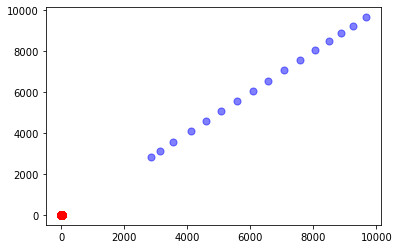

In [22]:
def reposiciona(pos,dados,rep):
    cont = np.zeros(shape=pos.shape,dtype='int')
    new_pos = np.zeros(shape=pos.shape,dtype='float')
    for i,v in enumerate(dados):
        k = rep[i]
        new_pos[k]+= v
        cont[k] += 1   
    new_pos = new_pos/cont
    if np.amin(cont)==0:
        print('******',cont)
    return new_pos
    

def kmeans(k,data,max_itr):
    pos = rep_ini(k,data)
    rep = np.zeros(shape=data.shape,dtype='int')
    for itr in range(max_itr):
        erro = atribui_rep(pos,data,rep)
        print(f'interacao = {itr}/{max_itr} - erro = {erro}')
        print(pos.astype(int))
        new_pos=reposiciona(pos,data,rep)
        erro2 = np.mean(np.sqrt((pos-new_pos)*(pos-new_pos)))
        print("Erro de pos ", erro2)                        
        if erro2  <10:
            break
        pos = new_pos
        
    plt.scatter(pos[:], pos[:], c='blue', s=50, alpha = 0.5)
    plt.scatter(rep[:], rep[:], c='red', s=50)
    plt.show()
    

kmeans(16,data,2)